In [98]:
import numpy as np
import matplotlib.pyplot as plt
from math import tanh
def f(x,t): 
   return x - np.tanh(x/t)

ts = np.linspace(0.001,1, 1000) #valid values of t

C:\Users\chyne\AppData\Local\Temp\ipykernel_4704\1360632775.py:3: RuntimeWarning: invalid value encountered in arctanh
  return m/(np.arctanh(m))


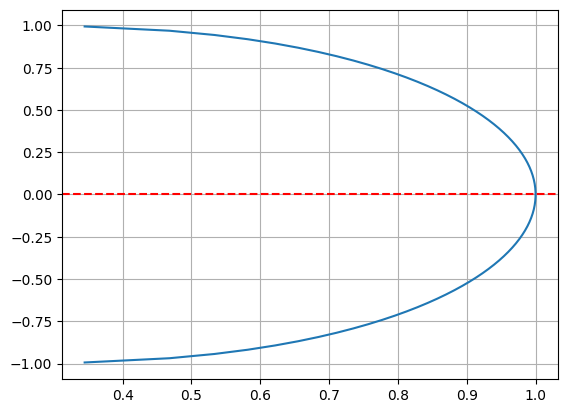

In [99]:
#first lets plot so we have an idea of what the roots are
def func(m): #t values
   return m/(np.arctanh(m))

m = np.linspace(-4*np.pi, 4*np.pi, 1000)

plt.plot(func(m), m)
plt.axhline(0, linestyle="--", color = "r")
plt.grid(True)
plt.show()

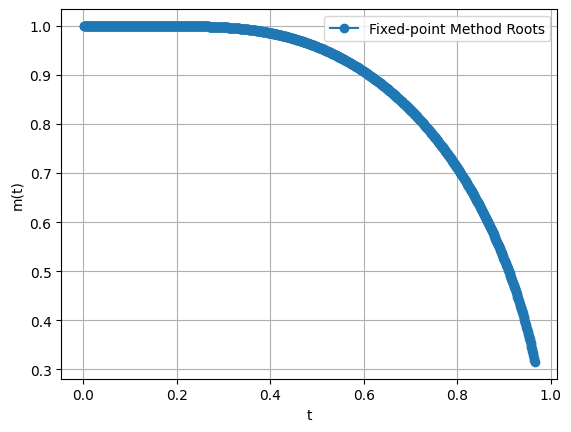

In [100]:
#Finding roots 
def fixed_point(g, x_o, kmax, tol): #g = function, x_o = initial guess, kmax = max iteration, tol = tolerance
    for k in range(1, kmax):
        xnew = g(x_o) # x = g(x)
        diff = xnew - x_o
        if (abs(diff)) < tol: 
            break 
        x_o = xnew
    else: 
        xnew = None
    return xnew

#Generate all roots
roots = []
for t in ts: 
    g = lambda x: np.tanh(x/t)   # define g for this specific t, rewrites f(x) so that x = g(x)
    root = fixed_point(g,1,200,1.e-8)
    roots.append(root)

plt.plot(ts, roots,'o-', label="Fixed-point Method Roots")
plt.xlabel("t")
plt.ylabel("m(t)")
plt.legend()
plt.grid(True)
plt.show()

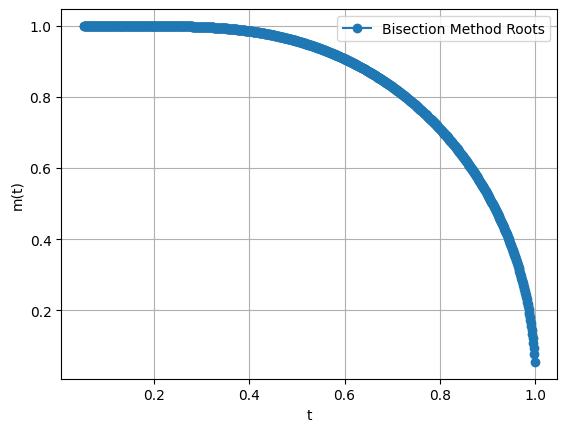

In [101]:
def bisection(f, a, b, kmax, tol): #f = function, a = negative bound, b = positive bound, kmax = max iteration, tol = tolerance 
    if f(a) * f(b) >= 0:
        return None
    else:
        for i in range(kmax):
            c = (a + b) / 2 #midpoint
            if abs(f(c)) < tol or (b - a) / 2 < tol:
                return c
            elif f(a) * f(c) < 0:
                b = c
            else:
                a = c
        return None

#Generate all roots
roots = []
for t in ts: 
    f_t = lambda x, t=t: f(x,t)  # define for speecific t
    root = bisection(f_t, 1e-6, 1, 200, 1.e-8)
    roots.append(root)

plt.plot(ts, roots,'o-', label="Bisection Method Roots")
plt.xlabel("t")
plt.ylabel("m(t)")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\chyne\AppData\Local\Temp\ipykernel_4704\2993109202.py:16: RuntimeWarning: overflow encountered in cosh
  return 1 - (1/np.cosh(x/t)**2)/t #numpy doesn't have sech
C:\Users\chyne\AppData\Local\Temp\ipykernel_4704\2993109202.py:16: RuntimeWarning: overflow encountered in scalar power
  return 1 - (1/np.cosh(x/t)**2)/t #numpy doesn't have sech


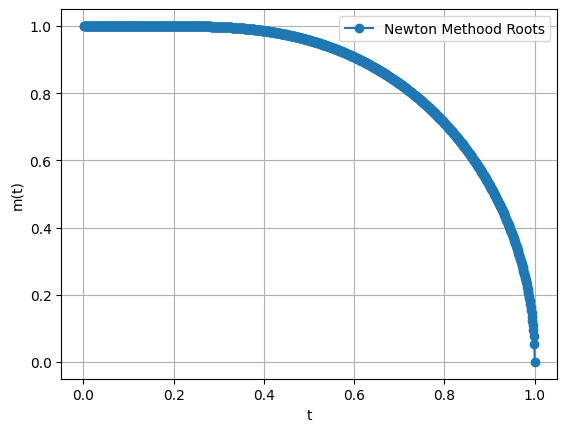

In [102]:
def newton(f, fp, x_o, kmax, tol): #f = function, f_p = first derivative, x_o = initial guess, kmax = max iteration, tol = tolerance 
    x = x_o
    for i in range(kmax):
        fx = f(x)
        fpx = fp(x)
        if fpx == 0:
            return None
        x_next = x - fx / fpx
        if abs(x_next - x) < tol:
            return x_next
        x = x_next
    return None

#we need the derivative:
def fprime(x,t):
    return 1 - (1/np.cosh(x/t)**2)/t #numpy doesn't have sech

#Generate all roots
roots = []
for t in ts: 
    f_t = lambda x, t=t: f(x,t)  # define for specific t
    fp_t = lambda x, t=t: fprime(x,t) # again, define for specfic t
    root = newton(f_t, fp_t, 1, 200, 1.e-8)
    roots.append(root)

plt.plot(ts, roots,'o-', label="Newton Methood Roots")
plt.xlabel("t")
plt.ylabel("m(t)")
plt.legend()
plt.grid(True)
plt.show()

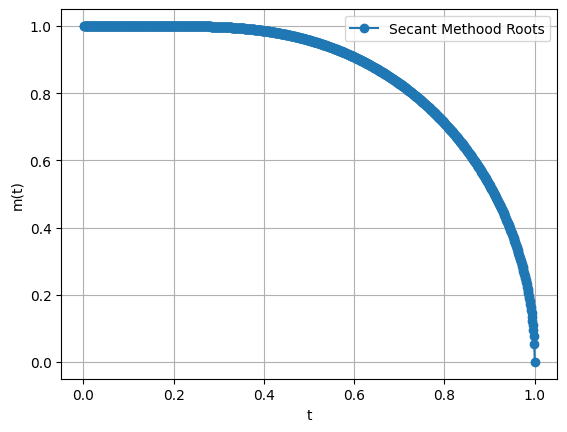

In [103]:
def secant(f, x_o, x_1, kmax, tol): #f = function, x_o = initial guess 1, x_1 = initial guess 2, kmax = max iteration, tol = tolerance 
    for i in range(kmax):
        f0, f1 = f(x_o), f(x_1)
        if f1 - f0 == 0:
            return None
        x_2 = x_1 - f1 * (x_1 - x_o) / (f1 - f0)
        if abs(x_2 - x_1) < tol:
            return x_2
        x_o, x_1 = x_1, x_2
    return None

#Generate all roots
roots = []
for t in ts: 
    f_t = lambda x, t=t: f(x,t)  # define for specific t
    root = secant(f_t, 0.5, 1, 200, 1.e-8)
    roots.append(root)

plt.plot(ts, roots,'o-', label="Secant Methood Roots")
plt.xlabel("t")
plt.ylabel("m(t)")
plt.legend()
plt.grid(True)
plt.show()

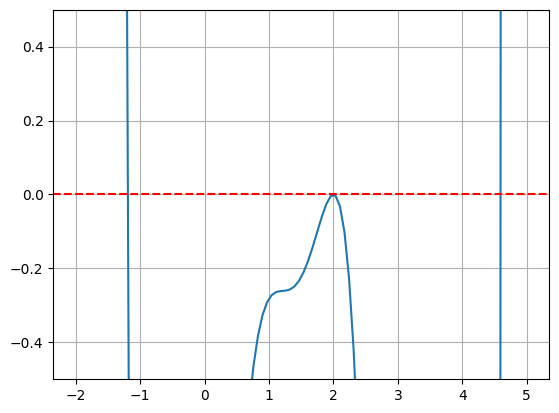

In [104]:
#Try another example: 
x = np.linspace(-2, 5, 100)
def the_func(x):
    return (-x**5) + (4*x**4) - (4*x**3) + ((x**2)*np.exp(x)) - \
            (2*x**2) - (4*x*np.exp(x)) + (8*x) + (4*np.exp(x)) - 8
def g(x):
    return (the_func(x) - 8*x)/(-8)

#lets plot first:
plt.plot(x, the_func(x))
plt.axhline(0, linestyle="--", color = "r")
plt.ylim(-0.5, 0.5)
plt.grid(True)



In [105]:
#Finding roots using fixed point, initial guesses = -1, 2, 5
print(fixed_point(g, 2, 200, 1.e-8))
print(fixed_point(g, -1.2, 200, 1.e-8)) #iteration diverges
print(fixed_point(g, 4.6, 200, 1.e-8)) #iteration diverges
#based from the plot, it makes sense that the iteration diverges for x =-1.2, and x = 4.6 since the slope at that point is very steep



2.0
None
None


C:\Users\chyne\AppData\Local\Temp\ipykernel_4704\3652603237.py:4: RuntimeWarning: overflow encountered in scalar power
  return (-x**5) + (4*x**4) - (4*x**3) + ((x**2)*np.exp(x)) - \
C:\Users\chyne\AppData\Local\Temp\ipykernel_4704\3652603237.py:4: RuntimeWarning: invalid value encountered in scalar multiply
  return (-x**5) + (4*x**4) - (4*x**3) + ((x**2)*np.exp(x)) - \
C:\Users\chyne\AppData\Local\Temp\ipykernel_4704\3652603237.py:5: RuntimeWarning: overflow encountered in scalar power
  (2*x**2) - (4*x*np.exp(x)) + (8*x) + (4*np.exp(x)) - 8
C:\Users\chyne\AppData\Local\Temp\ipykernel_4704\3652603237.py:5: RuntimeWarning: invalid value encountered in scalar multiply
  (2*x**2) - (4*x*np.exp(x)) + (8*x) + (4*np.exp(x)) - 8


In [106]:
#Finding roots using bisectionn method
print(bisection(the_func, 3, 5, 200, 1.e-8))
print(bisection(the_func, -2, -0.5, 200, 1.e-8))
print(bisection(the_func, 1, 3, 200, 1.e-8)) #doesn't work since the two endpoints have the same sign

4.595863558351994
-1.1926857698708773
None


In [107]:
#Finding roots using newton method
def fprime(x):
    return x**2*np.exp(x) - 2*x*np.exp(x) - 5*x**4 + 16*x**3 - 12*x**2 - 4*x + 8
print(newton(the_func, fprime, -1, 200, 1.e-8))
print(newton(the_func, fprime, 2, 200, 1.e-8)) #doesn't work since x =2 is a relative extremum so f'(x) = 0
print(newton(the_func, fprime, 4.5, 200, 1.e-8))

-1.1926857650225988
None
4.595863564922454


In [108]:
#Finding roots using secant method
print(secant(the_func, -1.5, -1, 200, 1.e-8))
print(secant(the_func, 1.8, 2.2, 200, 1.e-8)) #again doesn't work since at this oint f(x) = 0 = f'(x)
print(secant(the_func, 4.3, 4.7, 200, 1.e-8))

-1.1926857650225977
None
4.595863564922455
